In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


In [2]:
datasetName="/stor/public/hcad/heart_heart_HCLAdultHeart2/heart_heart_HCLAdultHeart2"

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv.gz"),header = TRUE, sep='\t',row.names = 1)

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

# analysis

In [5]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [6]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.8686”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.4269e-16”Centering and scaling data matrix


In [8]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  MYL9, TAGLN, ADIRF, IGFBP7, ACTA2, DSTN, TPM2, NDUFA4L2, CRYAB, PLN 
	   CYR61, SPARCL1, MYH11, CASQ2, MYL6, MT1L, HSPB6, MGP, CALM2, SEPT4 
	   LUM, SERPINF1, RGS5, CLU, SLC25A4, MT1E, RERGL, CKB, PTP4A3, C1R 
Negative:  LYZ, TYROBP, CTSS, FCN1, SAT1, FCER1G, CXCL8, AIF1, SRGN, BCL2A1 
	   SOD2, CD74, S100A8, PLAUR, LAPTM5, S100A9, C5AR1, CXCL2, NFKBIA, G0S2 
	   HLA-DRA, MS4A6A, FTH1, GPR183, IL1B, SERPINA1, OLR1, LST1, HLA-DRB1, PLEK 
PC_ 2 
Positive:  ACTA2, TAGLN, ADIRF, MYL9, TPM2, MYL6, DSTN, MT-CO1, MYH11, NDUFA4L2 
	   MT1L, CASQ2, PHLDA2, RGS5, SEPT4, RERGL, PLN, MYLK, PTP4A3, MT-ND4 
	   SNCG, CSRP2, KCNMB1, HSPB1, CNN1, MT-CO3, MT1E, COX4I2, CALM2, FABP4 
Negative:  LUM, CFD, SERPINF1, MGP, APOD, C1R, C1S, MFAP5, C7, GSN 
	   PCOLCE2, MFAP4, IGFBP6, EFEMP1, CCDC80, FBLN5, DPT, ABCA8, TIMP1, CDH19 
	   FBLN1, MGST1, FBLN2, FSTL1, PCOLCE, PRELP, C3, MMP2, COL1A2, CFH 
PC_ 3 
Positive:  C1QA, C1QB, C1QC, VSIG4, MRC1, FOLR2, RNASE1, CD163, LYVE1, CD74 
	   HLA

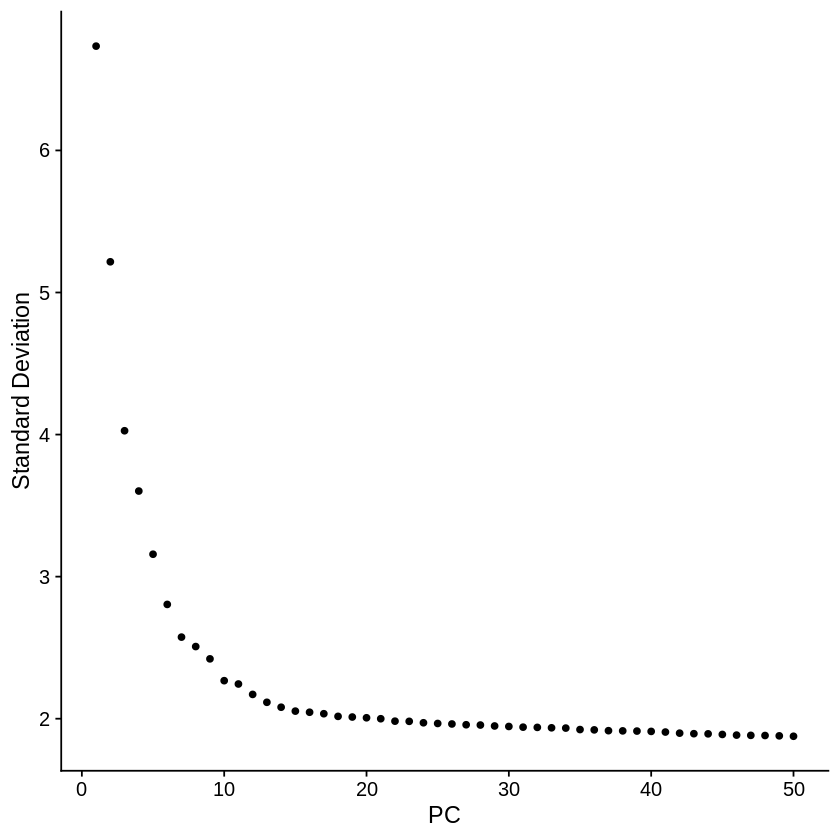

In [9]:
ElbowPlot(dataobj,50) 

In [10]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”00:59:19 UMAP embedding parameters a = 0.9922 b = 1.112
00:59:19 Read 1478 rows and found 30 numeric columns
00:59:19 Using Annoy for neighbor search, n_neighbors = 30
00:59:19 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
00:59:19 Writing NN index file to temp file /tmp/Rtmp1npaAh/file53d24db9ec33
00:59:19 Searching Annoy index using 1 thread, search_k = 3000
00:59:20 Annoy recall = 100%
00:59:20 Commencing smooth kNN distance calibration using 1 thread
00:59:21 Initializing from normalized Laplacian + noise
00:59:21 Commencing optimizatio

In [11]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

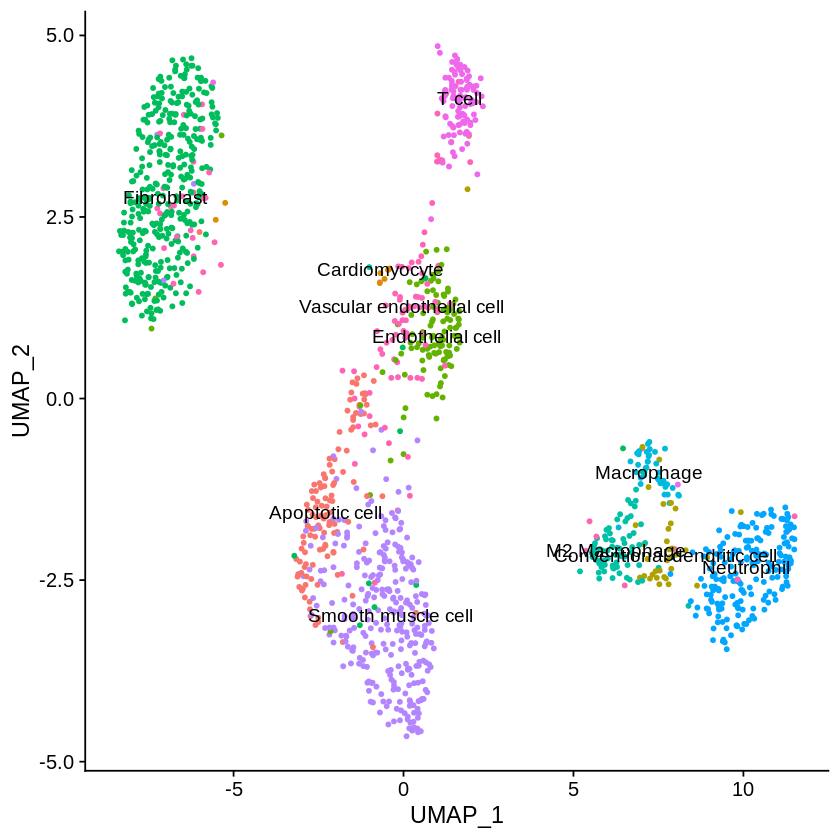

In [12]:
p_umap2

# Clustering

In [13]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


In [14]:
dataobj <- FindClusters(dataobj, resolution = 2.5, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1478
Number of edges: 81771

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5306
Number of communities: 11
Elapsed time: 0 seconds


In [15]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

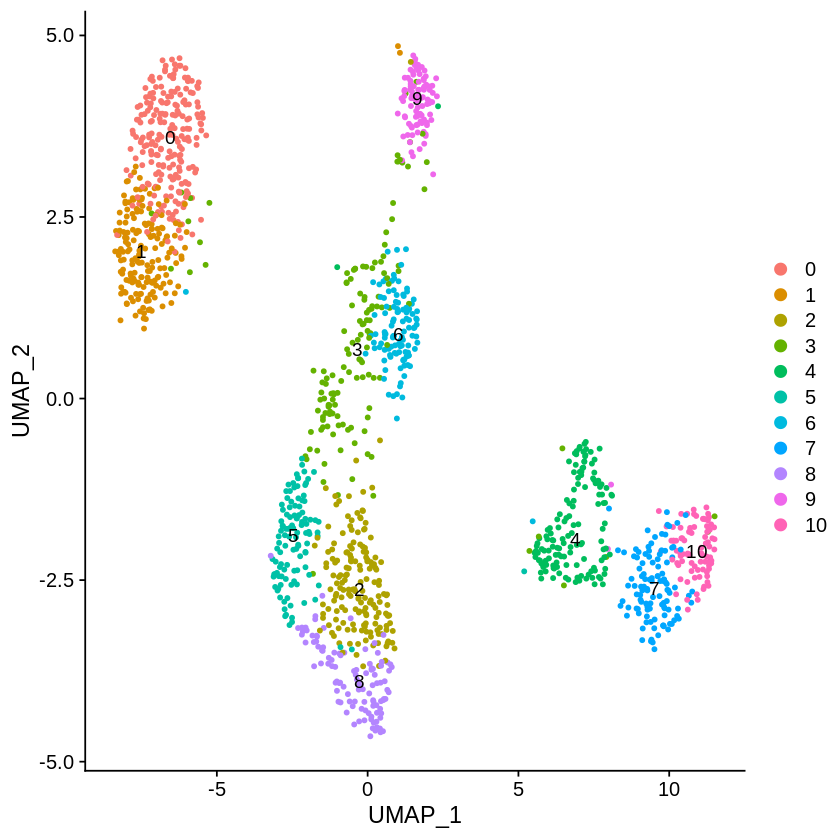

In [16]:
p_umap

# Finding cluster markers 

In [17]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10


# Annotation

In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [34]:
dataobj.markers[dataobj.markers['cluster']==10,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SERPINB2,1.326480e-105,3.473584,0.631,0.032,2.738650e-101,10,SERPINB2
C5AR11,1.369549e-98,2.341864,0.798,0.071,2.827570e-94,10,C5AR1
PLAUR1,7.227603e-96,2.745999,0.940,0.128,1.492211e-91,10,PLAUR
CXCL21,8.969965e-95,2.787665,0.952,0.131,1.851939e-90,10,CXCL2
CXCL82,2.840265e-94,3.009975,1.000,0.169,5.864012e-90,10,CXCL8
FCN11,1.077492e-93,2.131074,0.964,0.123,2.224591e-89,10,FCN1
BCL2A11,9.505583e-92,2.524140,0.905,0.118,1.962523e-87,10,BCL2A1
S100A91,1.600897e-90,2.636768,0.905,0.117,3.305212e-86,10,S100A9
S100A81,1.803936e-89,2.602854,0.881,0.110,3.724407e-85,10,S100A8


In [5]:
new.cluster.ids <- c('Heart-Connective Tissue-Fibrocyte-DCN LUM',
                     'Heart-Connective Tissue-Fibrocyte-DCN APOD',
                     'Heart-Musle Tissue-Smooth muscle cell-TAGLN ACTA2',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-CCL2 CD36',
                     'Heart-Connective Tissue-Macrophage-C1QB C1QA',
                     'Heart-Musle Tissue-Smooth muscle cell-PPP1R15A JUNB',
                     'Heart-Epithelial Tissue-Endothelial cell-VWF ADGRF5',
                     'Heart-Connective Tissue-Neutrophilic granulocyte-FCN1 S100A8',
                     'Heart-Musle Tissue-Smooth muscle cell-TPM2 TAGLN',
                     'Heart-Connective Tissue-T cell-CCL5 CST7',
                     'Heart-Connective Tissue-Neutrophilic granulocyte-SERPINB2 C5AR1')

In [6]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

In [7]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [8]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [9]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [10]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

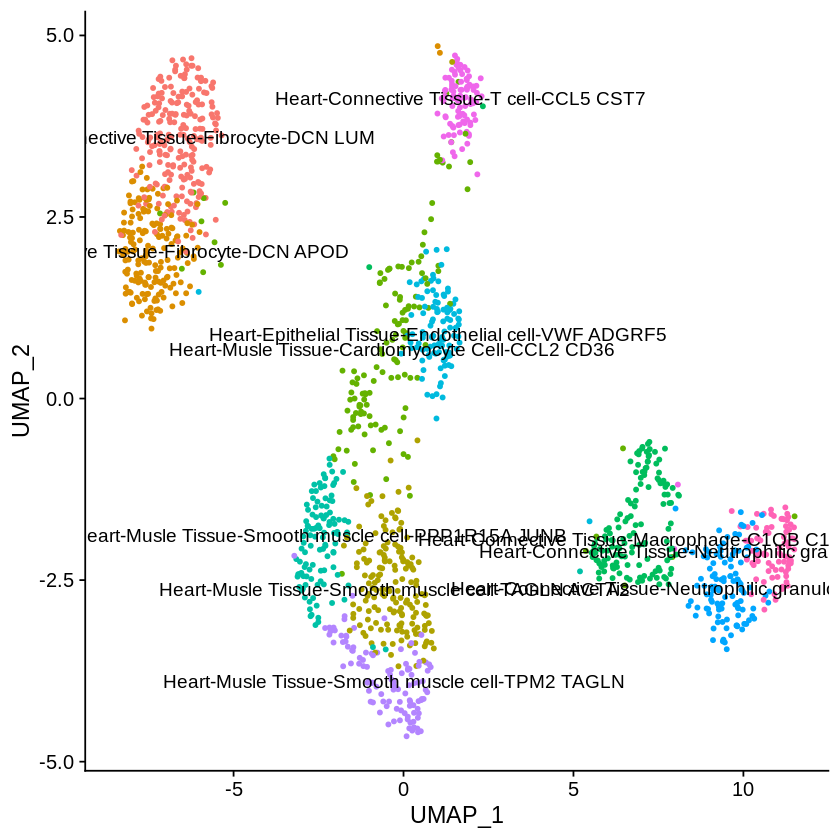

In [37]:
plot

In [38]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = plot, width = 8, height = 5)